In [8]:
import scanpy as sc
import pandas as pd
import numpy as np
# import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from anndata import AnnData
import scipy.sparse as sp
import anndata as ad

import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

sample_ids = [f"{i:03d}" for i in range(1, 19)]

# List to store individual adatas
adatas = []

# Loop through each sample
for sid in sample_ids:
    sample_id = f"IMMUNEX{sid}"
    path = f"/home/mounim/rawdata/IMMUNEX/OUTPUT/Visium_NSCLC_{sample_id}/outs/binned_outputs/square_016um/filtered_feature_bc_matrix.h5"
    
    if os.path.exists(path):
        adata = sc.read_10x_h5(path)
        adata.var_names_make_unique()
        adata.raw = adata
        adata.uns['sample_id'] = sample_id
        adata.obs['sample_id'] = sample_id  # Add sample ID to obs for tracking
        adatas.append(adata)
    else:
        print(f"File not found for sample {sample_id}: {path}")

# Concatenate all samples into one AnnData object
adata = ad.concat(adatas, label='batch', keys=sample_ids, index_unique='-')

adata.obs.sample(5)

/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/anndata/_core/anndata.py

,sample_id,batch
s_016um_00236_00069-1-006,IMMUNEX006,006
s_016um_00186_00288-1-008,IMMUNEX008,008
s_016um_00023_00403-1-001,IMMUNEX001,001
s_016um_00109_00012-1-009,IMMUNEX009,009
s_016um_00259_00165-1-005,IMMUNEX005,005


In [9]:
nsclc_markers = {
    "Tumor cells": ["EPCAM", "KRT19", "KRT8"],
    "T cells": ["CD3D", "CD3E", "CD2"],
    "Cytotoxic T cells": ["CD8A", "GZMB"],
    "Helper T cells": ["CD4"],
    "B cells": ["MS4A1", "CD79A"],
    "Macrophages / Monocytes": ["CD68", "CD14"],
    "Dendritic cells": ["FCER1A", "CLEC9A"],
    "NK cells": ["NCAM1", "NKG7"],
    "Fibroblasts": ["COL1A1", "PDGFRA"],
    "Endothelial cells": ["PECAM1", "VWF"]
}

In [10]:
# QC
adatas_filtered = []
for adata in adatas:
    sample_id = adata.obs['sample_id'][0]
    nsbf = adata.n_obs
    # Identify mitochondrial genes (only if symbols used)
    adata.var['mt'] = adata.var_names.str.upper().str.startswith('MT-')

    # Compute QC metrics
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

    # Dynamically compute thresholds
    min_genes = np.percentile(adata.obs['n_genes_by_counts'], 25)
    max_counts = np.percentile(adata.obs['total_counts'], 90)
    max_mito = np.percentile(adata.obs['pct_counts_mt'], 90)
    min_mito = np.percentile(adata.obs['pct_counts_mt'], 90)

    # Apply filtering
    adata = adata[
        (adata.obs['n_genes_by_counts'] > min_genes) &
        (adata.obs['total_counts'] < max_counts) &
        # (adata.obs['pct_counts_mt'] < max_mito) &
        (1)
    ].copy()

    print(f"✅ {sample_id}: kept {adata.n_obs} spots after filtering out of {nsbf}")

    adatas_filtered.append(adata)




/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX001: kept 110609 spots after filtering out of 170351


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX002: kept 111736 spots after filtering out of 172575


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX003: kept 113932 spots after filtering out of 175431


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX004: kept 111538 spots after filtering out of 173195


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX005: kept 113226 spots after filtering out of 174660


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX006: kept 103273 spots after filtering out of 159065


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX007: kept 113343 spots after filtering out of 175455


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX008: kept 105897 spots after filtering out of 163351


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX009: kept 112893 spots after filtering out of 174833


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX010: kept 93735 spots after filtering out of 144267


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX011: kept 113156 spots after filtering out of 175065


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX012: kept 108693 spots after filtering out of 168354


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX013: kept 109073 spots after filtering out of 169420


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX014: kept 109439 spots after filtering out of 168967


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX015: kept 111692 spots after filtering out of 172054


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX016: kept 106851 spots after filtering out of 164997


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX017: kept 96614 spots after filtering out of 149052


/tmp/ipykernel_3365494/541331305.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_id = adata.obs['sample_id'][0]


✅ IMMUNEX018: kept 99961 spots after filtering out of 153910


In [11]:
adatas_filtered


[AnnData object with n_obs × n_vars = 110609 × 18536
     obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'sample_id',
 AnnData object with n_obs × n_vars = 111736 × 18536
     obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', '

In [12]:
# adata_filtred = ad.concat(adatas_filtered, label='batch', keys=[a.uns['sample_id'] for a in adatas_filtred], index_unique='-')
adata_filtred = ad.concat(adatas_filtered, label='batch',
                          keys=[a.uns['sample_id'] for a in adatas_filtered],
                          index_unique='-')

import scanpy as sc

# Normalize per cell
sc.pp.normalize_total(adata_filtred, target_sum=1e4)
sc.pp.log1p(adata_filtred)
adata_filtred.raw = adata_filtred  # store raw counts

nsclc_markers = {
    "Tumor cells": ["EPCAM", "KRT19", "KRT8"],
    "T cells": ["CD3D", "CD3E", "CD2"],
    "Cytotoxic T cells": ["CD8A", "GZMB"],
    "Helper T cells": ["CD4"],
    "B cells": ["MS4A1", "CD79A"],
    "Macrophages / Monocytes": ["CD68", "CD14"],
    "Dendritic cells": ["FCER1A", "CLEC9A"],
    "NK cells": ["NCAM1", "NKG7"],
    "Fibroblasts": ["COL1A1", "PDGFRA"],
    "Endothelial cells": ["PECAM1", "VWF"]
}

marker_genes = set(gene for genes in nsclc_markers.values() for gene in genes)

marker_genes_present = [g for g in marker_genes if g in adata.var_names]
# Identify highly variable genes
# Step 1: Compute HVGs per sample and collect their union
all_hvgs = set()

for ad in tqdm(adatas_filtered):
    sc.pp.highly_variable_genes(ad, flavor="seurat_v3", n_top_genes=1000)
    sample_hvgs = ad.var_names[ad.var['highly_variable']]
    all_hvgs.update(sample_hvgs)

# Step 2: Add marker genes to ensure biological relevance
all_hvgs.update(marker_genes_present)

print(f'adata_filtred  :', {adata_filtred.shape})
# Step 3: Subset the merged object (adata_filtred)
adata_hvg = adata_filtred[:, list(all_hvgs.intersection(adata_filtred.var_names))].copy()
print(f'adata_filtred  :', {adata_hvg.shape})



print(adata_hvg.shape)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.34it/s]


adata_filtred  : {(1945661, 18536)}
adata_filtred  : {(1945661, 7296)}
(1945661, 7296)


In [13]:
import pandas as pd

# Load clinical data
clinical_df = pd.read_csv("/home/mounim/rawdata/IMMUNEX/data/VisiumHD_18_2024_NSCLC.csv")

# Preview
clinical_df['sample_id'] = clinical_df['HE_image_name'].str[:10]

adata_hvg.obs = adata_hvg.obs.merge(clinical_df, on='sample_id', how='left')

display(adata_hvg.obs.head())
display(adata_hvg.var.head())

,sample_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,Average_fragment_size,Concentratio_pg_per_µL,Concentration finale (ng/µL),Final_concentration_nM,Dual _Index,Volume_available_µL,Volume_send_µL,Sample_code,Position_on_the_plaque,Sea_Dual_Index_TS_Set_A
0,IMMUNEX001,187,5.236442,437.0,6.082219,68.649886,80.091533,100.000000,100.0,6.0,...,252,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT"
1,IMMUNEX001,492,6.200509,573.0,6.352629,22.862129,31.588133,49.040140,100.0,28.0,...,252,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT"
2,IMMUNEX001,201,5.308268,218.0,5.389072,30.733945,53.669725,99.541284,100.0,7.0,...,252,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT"
3,IMMUNEX001,498,6.212606,593.0,6.386879,22.259696,32.883642,49.747049,100.0,33.0,...,252,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT"
4,IMMUNEX001,369,5.913503,504.0,6.224558,36.706349,46.626984,66.468254,100.0,9.0,...,252,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT"


""
OR4K13
FAM171A1
STRIP2
FHL1
MYBL2


Index([], dtype='object')


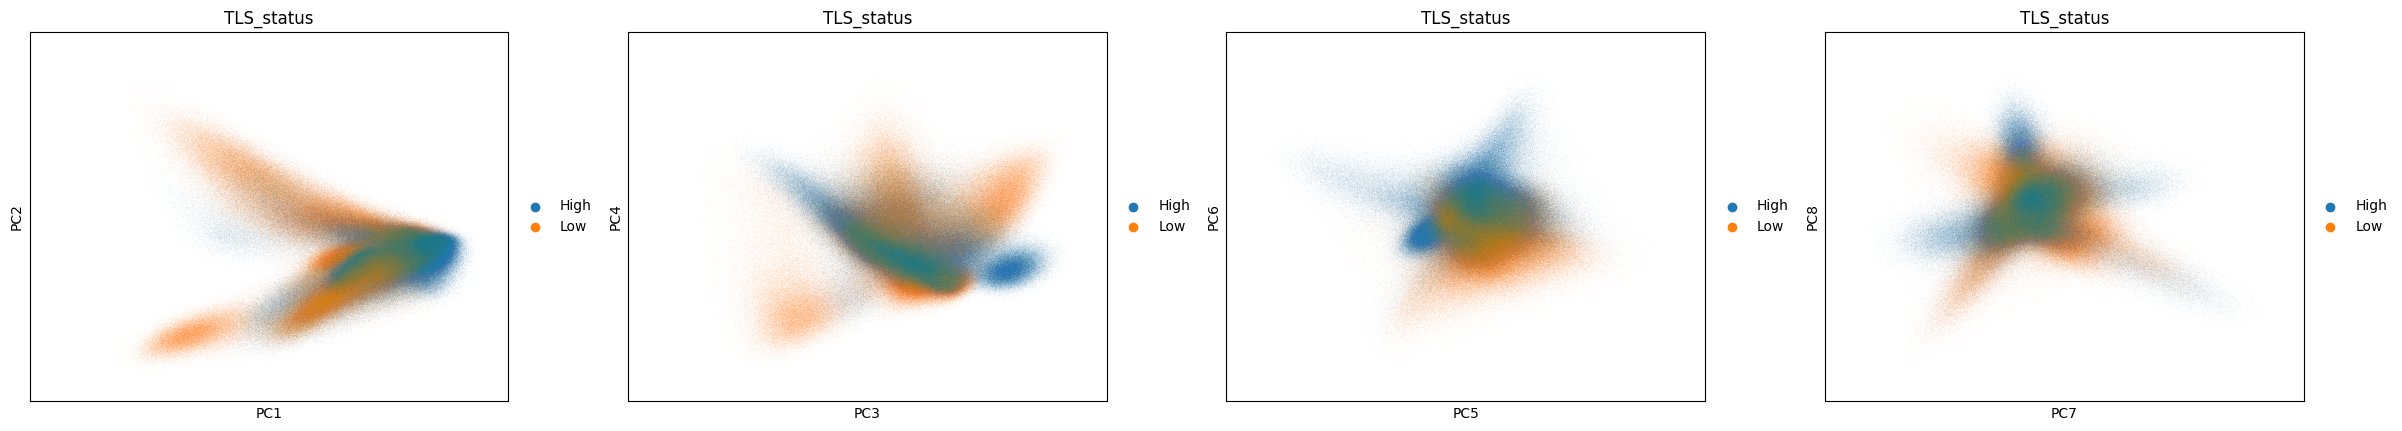

variance


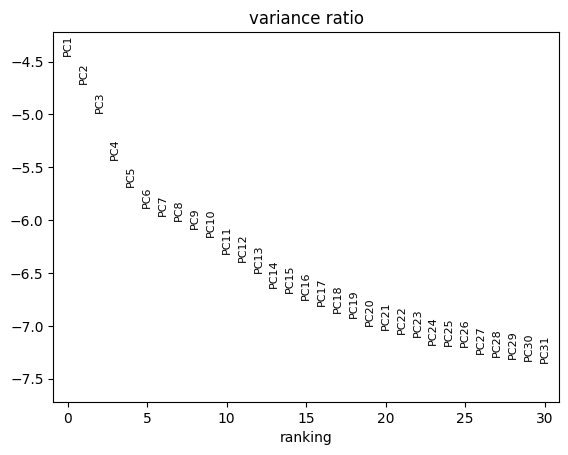

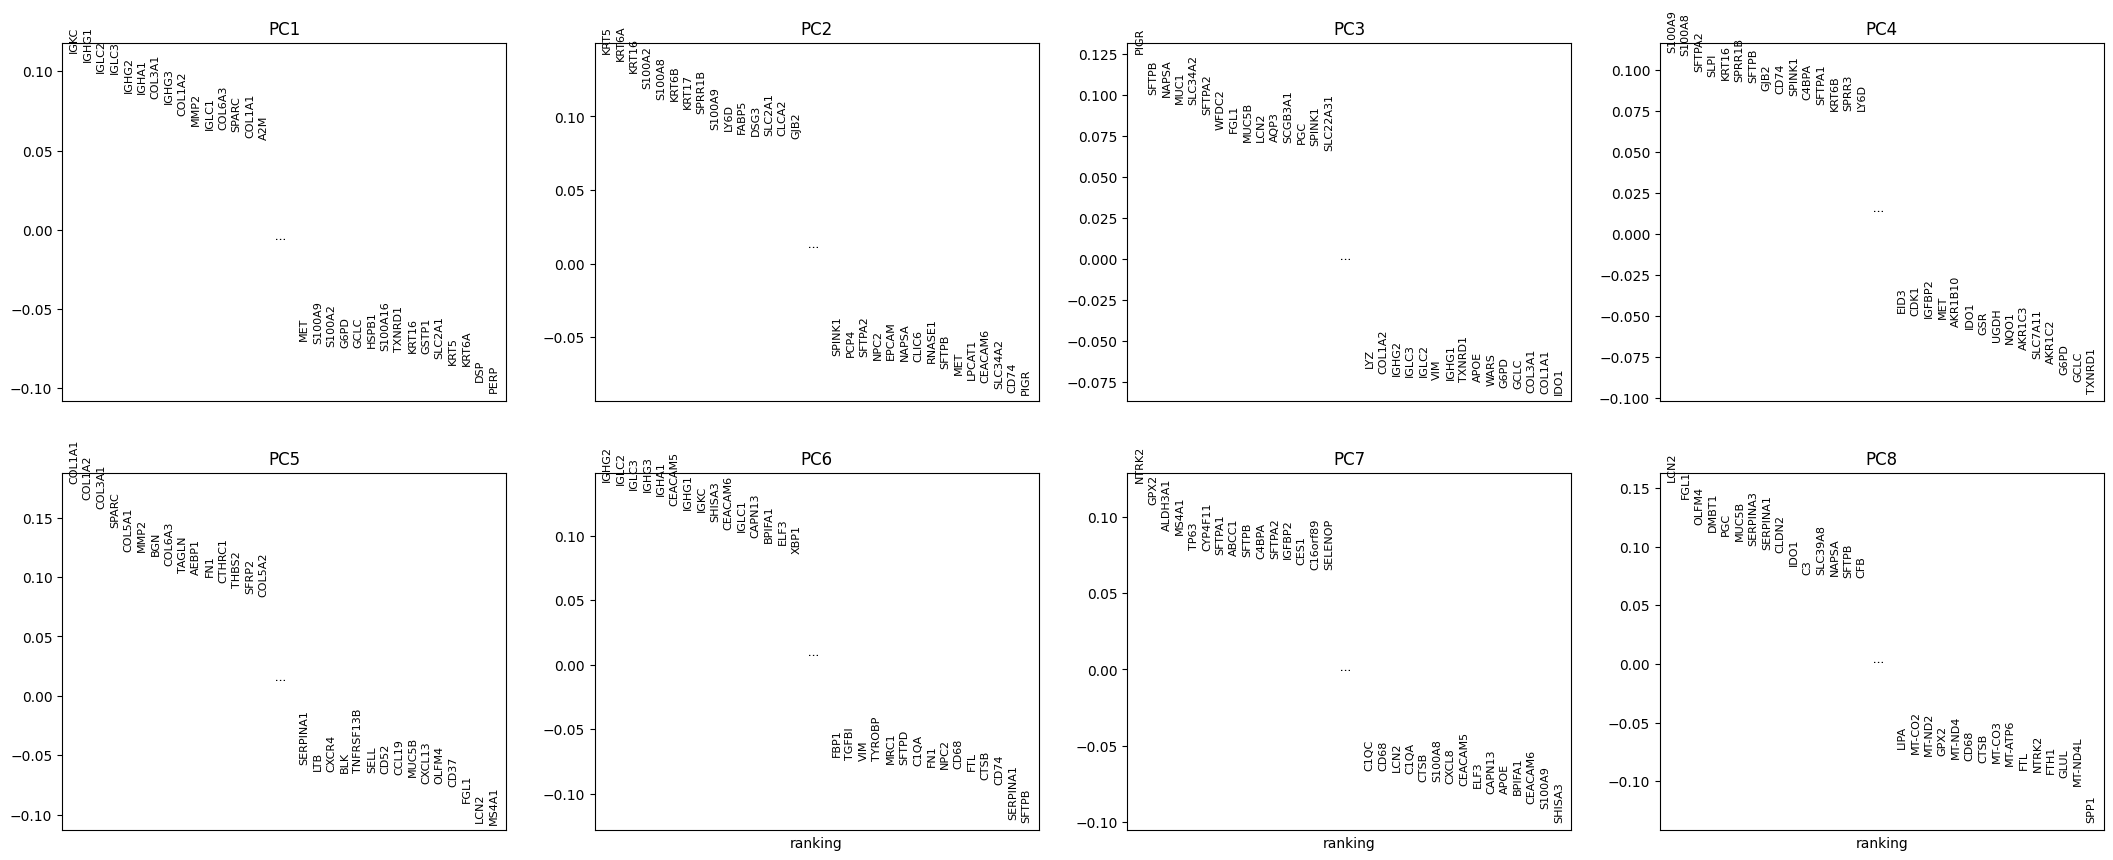

In [14]:
print(adata_hvg.var.columns)
# Should include 'highly_variable'
sc.pp.scale(adata_hvg, max_value=10)
sc.tl.pca(adata_hvg, svd_solver='arpack')
sc.pl.pca(adata_hvg, color=['TLS_status'],components=['1,2','3,4','5,6','7,8'])

# pca_variance_ratio plot
print('variance')
sc.pl.pca_variance_ratio(adata_hvg, log=True)

#PCA loadings plot
# Shows which genes contribute most to each PC (components of each axis):
sc.pl.pca_loadings(adata_hvg, components=[1,2,3,4,5,6,7,8], show=True)



In [15]:
# Compute neighbors
sc.pp.neighbors(adata_hvg, n_neighbors=10, n_pcs=12)

2025-06-27 17:29:55.194251: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-27 17:29:55.207832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-27 17:29:55.220318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-27 17:29:55.223634: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-27 17:29:55.235260: I tensorflow/core/platform/cpu_feature_guar

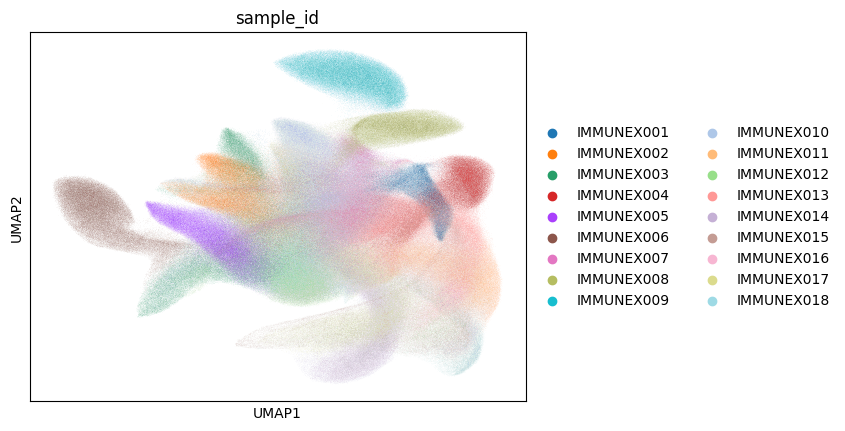

In [16]:
# # Run UMAP
sc.tl.umap(adata_hvg)

# UMAP colored by sample and cluster
sc.pl.umap(adata_hvg, color=['sample_id'])

In [ ]:

adata_hvg.obs.columns

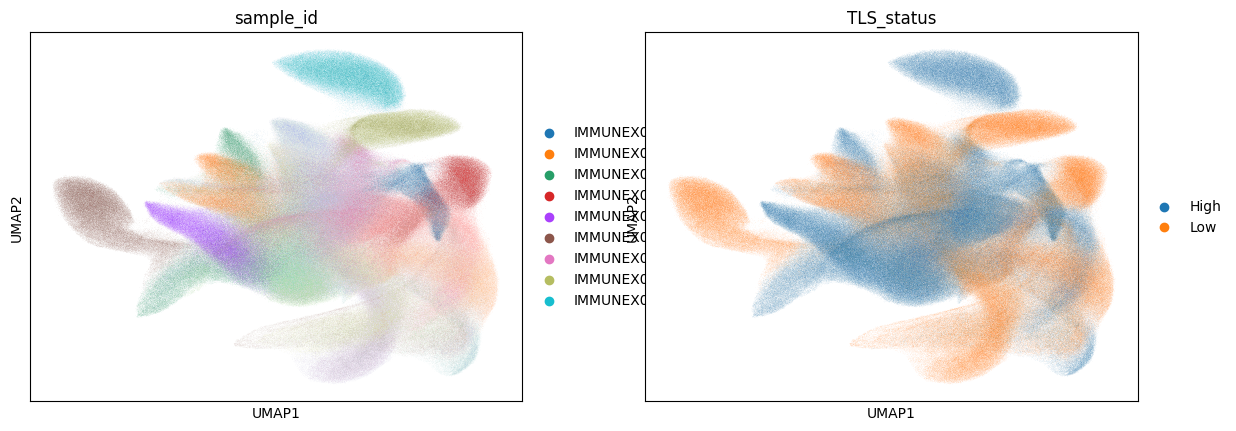

In [17]:
sc.pl.umap(adata_hvg, color=['sample_id','TLS_status'])

In [ ]:
# Cluster with Leiden
sc.tl.leiden(adata_hvg, resolution=1)

try:
    sc.pl.umap(adata_hvg, color=['leiden','sample_id','TLS_status'])
except:
    adata_hvg.obs['TLS_status'] =  adata_hvg.obs['TLS_status_x']  
    sc.pl.umap(adata_hvg, color=['leiden','sample_id','TLS_status_x'])

In [19]:
## Data integration with scVI
import scvi

# Use raw counts
adata_raw = adata_hvg.raw.to_adata().copy()

# Register the AnnData with scvi
scvi.model.SCVI.setup_anndata(adata_raw, batch_key="sample_id")

# Create and train the model
model = scvi.model.SCVI(adata_raw)
model.train()


/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=255` in the `DataLoader` to improve performance.


Epoch 1/4:   0%|                                                                                                                                                                                                             | 0/4 [00:00<?, ?it/s]

/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/4:  25%|██████████████████████████████████                                                                                                      | 1/4 [09:04<27:14, 544.94s/it, v_num=1, train_loss_step=1.97e+3, train_loss_epoch=2.01e+3]

/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/4:  50%|████████████████████████████████████████████████████████████████████                                                                    | 2/4 [18:07<18:07, 543.75s/it, v_num=1, train_loss_step=1.82e+3, train_loss_epoch=1.85e+3]

/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/4:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 3/4 [26:55<08:56, 536.44s/it, v_num=1, train_loss_step=1.78e+3, train_loss_epoch=1.83e+3]

/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/mounim/miniconda3/envs/enact/lib/python3.10/site-packages/scvi/module/_vae.py:460: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/4: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [35:41<00:00, 532.09s/it, v_num=1, train_loss_step=1.89e+3, train_loss_epoch=1.83e+3]

`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch 4/4: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [35:41<00:00, 535.26s/it, v_num=1, train_loss_step=1.89e+3, train_loss_epoch=1.83e+3]


In [21]:
# Store the integrated latent space (e.g., 10D)
adata_raw.obsm["X_scVI"] = model.get_latent_representation()


In [22]:
sc.pp.neighbors(adata_raw, use_rep="X_scVI")

Epoch 1/4:   0%|                                                                                                                                                                                                             | 0/4 [52:31<?, ?it/s]


In [23]:
sc.tl.umap(adata_raw)

In [24]:

sc.tl.leiden(adata_raw)



/tmp/ipykernel_3365494/495021107.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_raw)


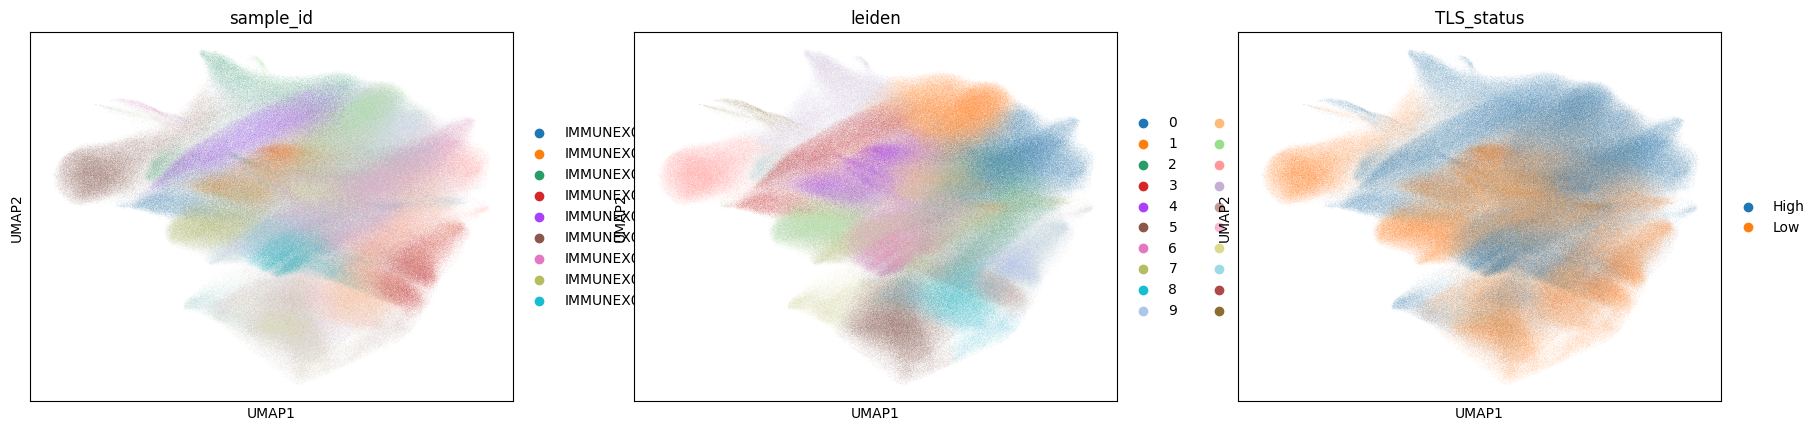

In [25]:
sc.pl.umap(adata_raw, color=["sample_id", "leiden", "TLS_status"])

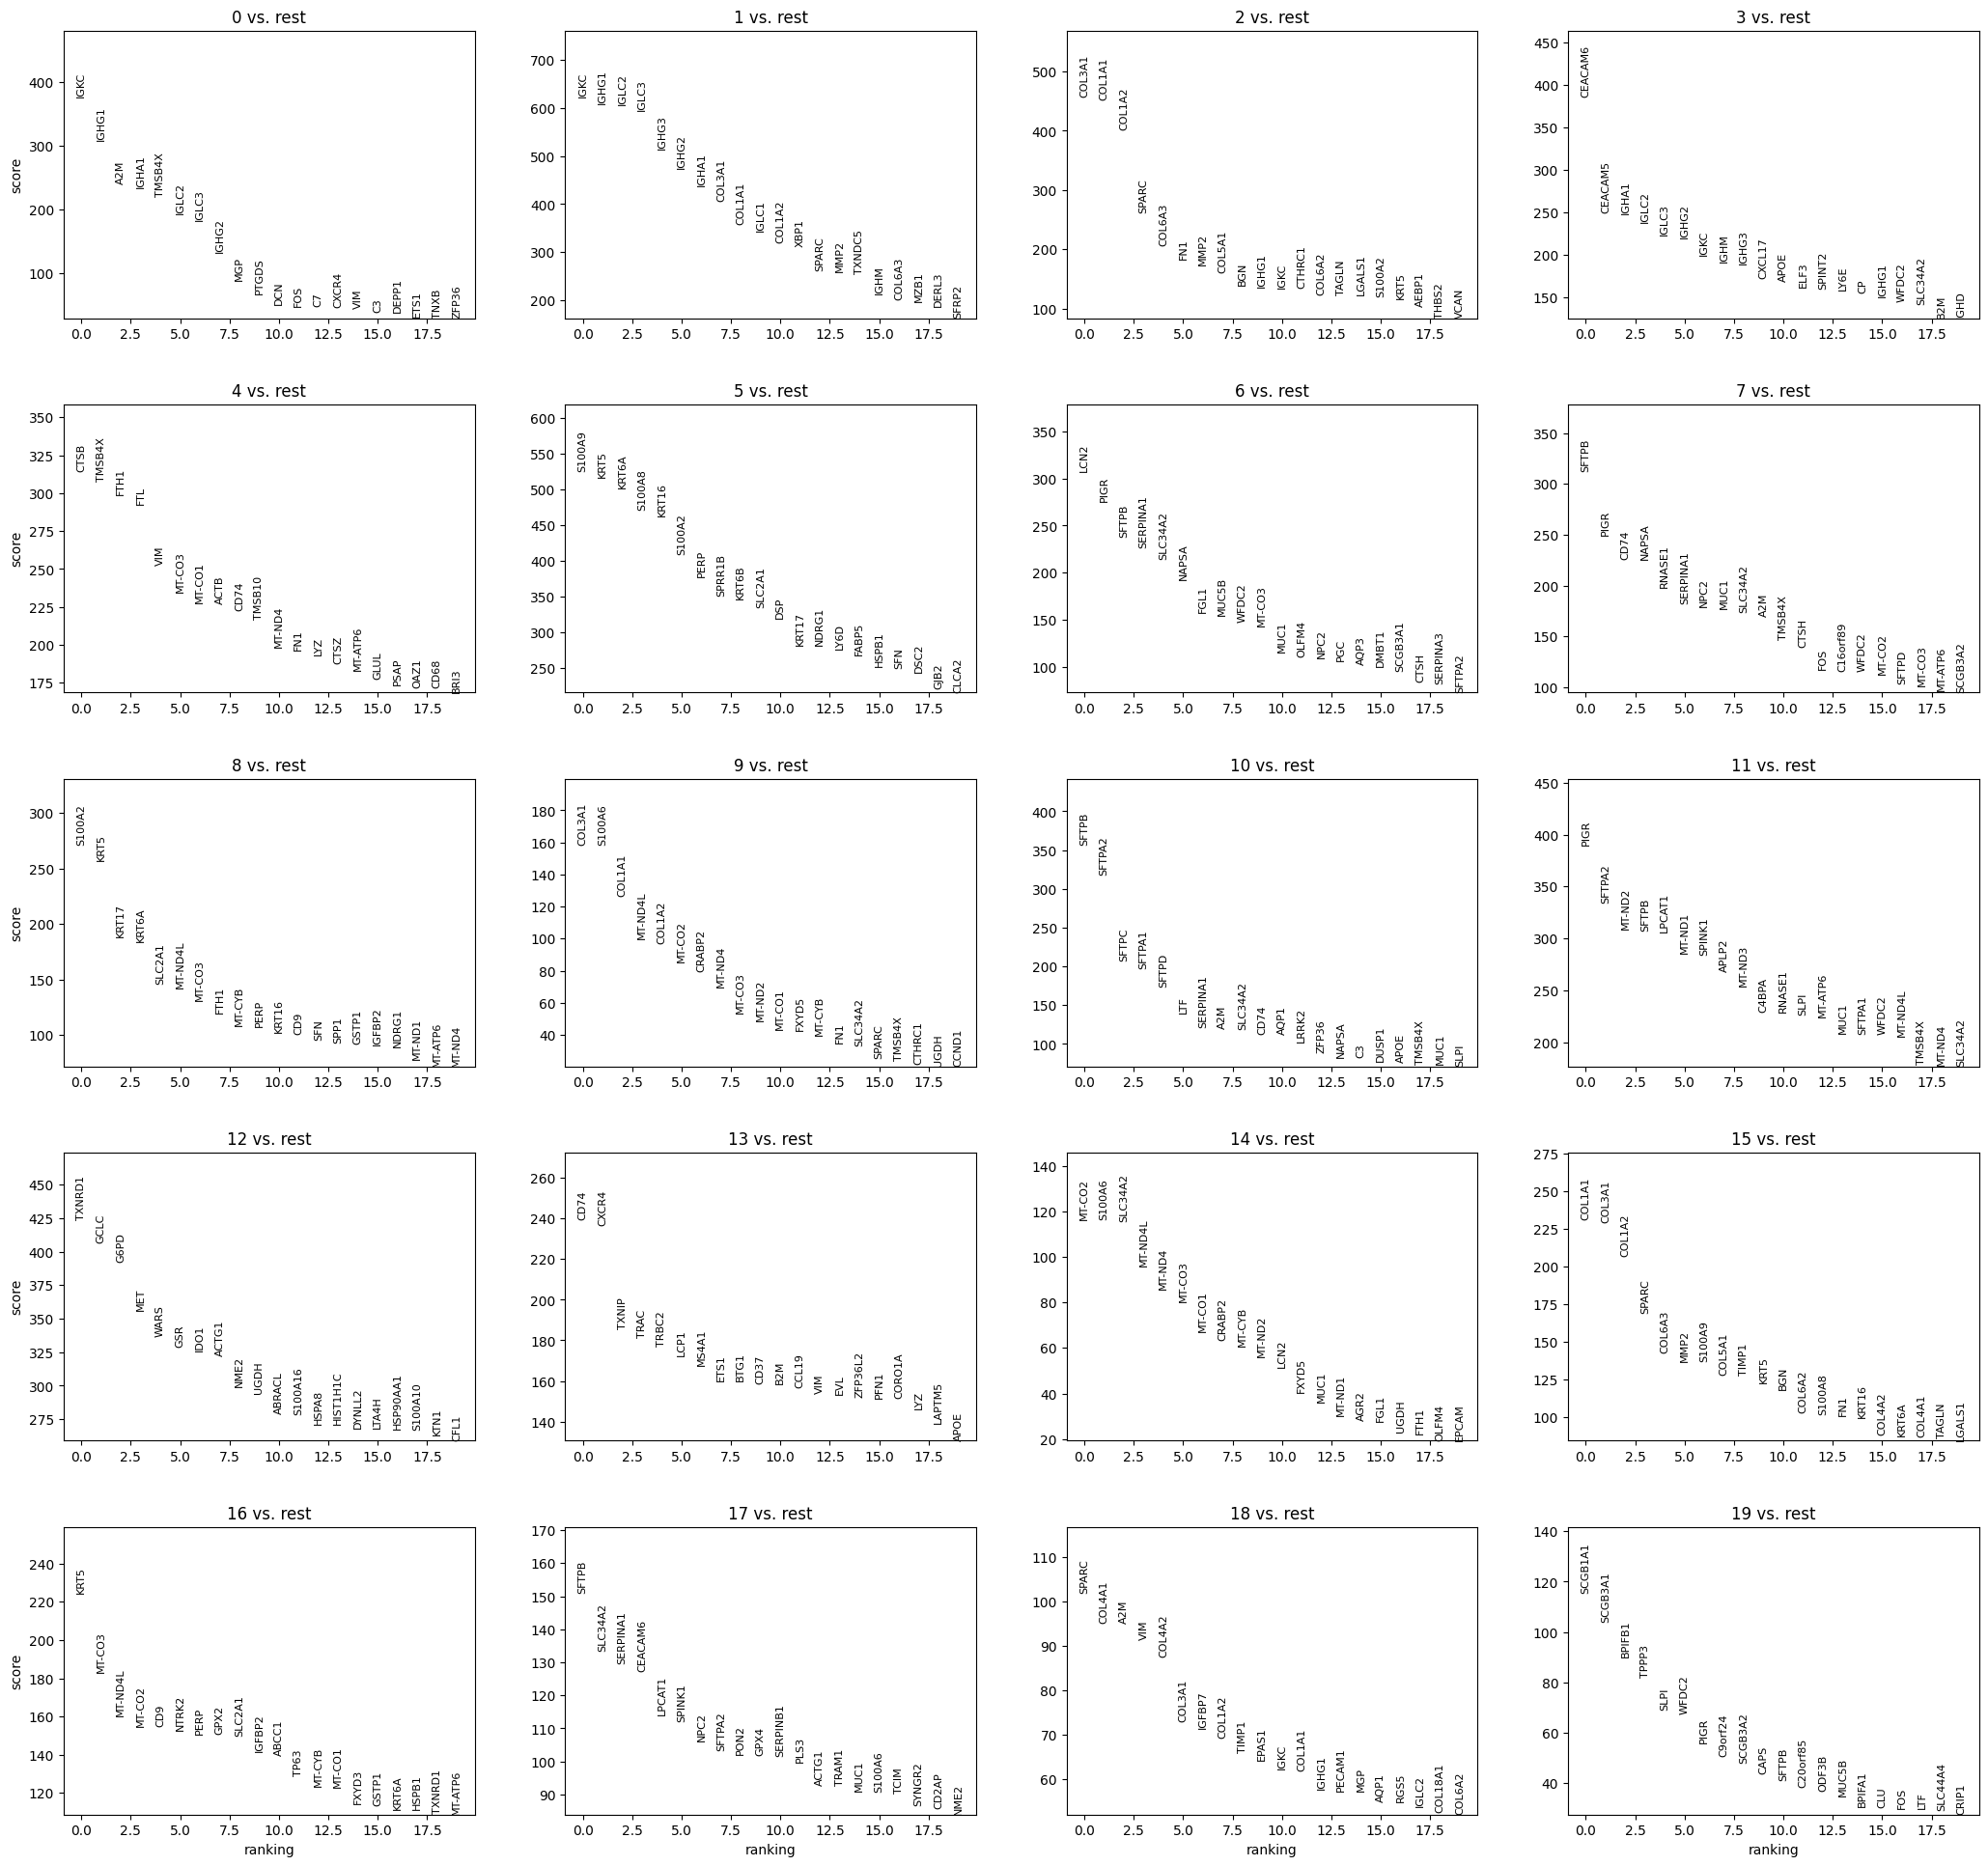

,names,scores,logfoldchanges,pvals,pvals_adj
0,IGKC,376.290710,3.682839,0.0,0.0
1,IGHG1,308.699554,3.051072,0.0,0.0
2,A2M,240.081345,2.430441,0.0,0.0
3,IGHA1,234.586853,2.440223,0.0,0.0
4,TMSB4X,220.280746,0.537561,0.0,0.0
5,IGLC2,192.942566,1.925958,0.0,0.0
6,IGLC3,183.026459,1.830741,0.0,0.0
7,IGHG2,133.099487,1.662097,0.0,0.0
8,MGP,89.102180,1.477038,0.0,0.0
9,PTGDS,67.089767,1.799229,0.0,0.0


In [26]:
sc.tl.rank_genes_groups(adata_raw, groupby="leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata_raw, n_genes=20, sharey=False)
sc.get.rank_genes_groups_df(adata_raw, group='0').head(10)


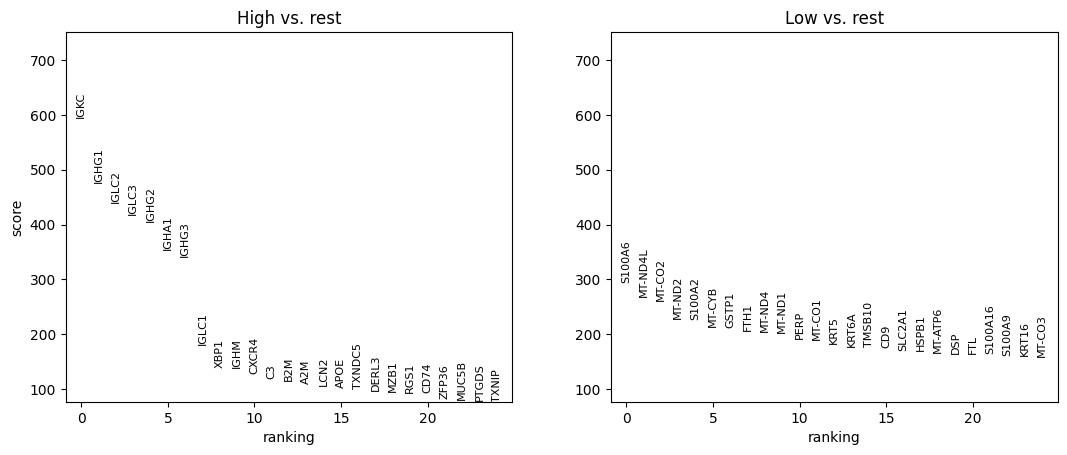

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [45:26<00:00, 2726.69s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
S100A8,0.9666,0.0334,3.365229,0.000538,0.001137,0.0,0.25,-2.032140,-1.846386,7.149370,...,0.159595,0.720667,0.041659,0.169787,1.963803,7.892296,True,High vs Low,High,Low
SPRR1B,0.9660,0.0340,3.346803,0.000291,0.000673,0.0,0.25,-1.507956,-1.580061,6.385761,...,0.105882,0.386098,0.029105,0.094928,1.154740,4.581655,True,High vs Low,High,Low
KRT6B,0.9618,0.0382,3.225971,0.000294,0.000756,0.0,0.25,-1.924738,-1.927782,5.846692,...,0.123464,0.380137,0.032158,0.099555,1.409255,4.081069,True,High vs Low,High,Low
KRT16,0.9618,0.0382,3.225971,0.000296,0.001055,0.0,0.25,-2.392921,-2.472401,5.915210,...,0.123623,0.692481,0.031231,0.163777,1.423700,7.844371,True,High vs Low,High,Low
SFTPA2,0.9608,0.0392,3.199089,0.001077,0.000987,0.0,0.25,0.270146,-0.012548,8.564298,...,0.515155,0.714376,0.128826,0.180245,6.845335,6.524031,True,High vs Low,High,Low


In [27]:
# Using scanpy (non-batch-aware)
sc.tl.rank_genes_groups(adata_raw, groupby="TLS_status", method="wilcoxon")
sc.pl.rank_genes_groups(adata_raw, n_genes=25)

# Using scVI (batch-aware DE)
de_df = model.differential_expression(groupby="TLS_status", group1="High", group2="Low")
de_df.head()


In [ ]:
sc.tl.rank_genes_groups(
    adata_raw,
    groupby="TLS_status",
    groups=["High"],      # Test High vs rest or vs reference
    reference="Low",
    method="wilcoxon",
    pts=True
)
sc.pl.rank_genes_groups(adata_raw, n_genes=25, sharey=False, title="DE: High vs Low (Scanpy)")


de_df = model.differential_expression(
    groupby="TLS_status",
    group1="High",
    group2="Low",
    batch_correction=True,
)

import seaborn as sns
import matplotlib.pyplot as plt

# Filter for significantly DE genes
sig_de = de_df.query("is_de & bayes_factor > 1")

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=sig_de,
    x="lfc_mean",
    y=-np.log10(sig_de["pval"]),
    hue="bayes_factor",
    palette="viridis",
    edgecolor="k"
)
plt.axhline(-np.log10(0.05), ls="--", color="red")
plt.axvline(0, color="grey", lw=1)
plt.title("DE: High vs Low (scVI)")
plt.xlabel("log2 fold change")
plt.ylabel("-log10 p-value")
plt.legend(title="Bayes factor")
plt.tight_layout()
plt.show()


scanpy_de = sc.get.rank_genes_groups_df(adata_raw, group="High")
scvi_de = de_df.query("is_de & bayes_factor > 1")

common_genes = set(scanpy_de['names']).intersection(scvi_de['gene'])
print("Common DE genes:", sorted(common_genes))


In [ ]:


de_df_high = model.differential_expression(
    groupby="TLS_status",
    group1="High",      
    group2="Low",      
    batch_correction=True,
)

high_sig = de_df_high.query("is_de & bayes_factor > 1").sort_values("lfc_mean", ascending=False)

# Plot
sns.barplot(
    y=high_sig['gene'].head(20),
    x=high_sig['lfc_mean'].head(20),
    orient='h'
)

de_df_low = model.differential_expression(
    groupby="TLS_status",
    group1="Low",        # TLS-low as target
    group2="High",       # TLS-high as reference
    batch_correction=True,
)

low_sig = de_df_low.query("is_de & bayes_factor > 1").sort_values("lfc_mean", ascending=False)

# Plot
sns.barplot(
    y=low_sig['gene'].head(20),
    x=low_sig['lfc_mean'].head(20),
    orient='h'
)


DE...:   0%|                                                                                                                                                                                                                 | 0/1 [00:00<?, ?it/s]